### SVM: Support Vector Machine

Support Vector Machine (SVM) is a supervised machine learning algorithm mostly used for classification.

SVM finds the best decision boundary (called a hyperplane) that separates the classes with the maximum margin.

#### Concept of Hyperplane and Margin

* Hyperplane

A hyperplane is a line (in 2D) or plane (in 3D) that separates classes.

Examples:

In 2D → a straight line separating two classes

In 3D → a flat plane

In higher dimensions → a hyperplane

* Margin

Margin = the distance between the hyperplane and the nearest data points.

These nearest points are called Support Vectors.

* Goal of SVM

Find the hyperplane that maximizes the margin → best separation between classes → better generalization.

#### Kernel Trick (Types of Kernels)

SVM can work with non-linear data using kernels.

️1 Linear Kernel

* Used when data is linearly separable.
* Decision boundary = straight line

2️ Polynomial Kernel

* Used when data has curved boundaries.
* You can change degree (2,3,4…)

3️ RBF Kernel (Radial Basis Function)

* Most powerful and commonly used
* Handles complex, non-linear patterns

Decision boundary can be circular, curved, irregular

#### Buisness case: With The Given features ,we need to predict wehether loan will be approved or not. 

In [1]:
# Supervised Learning with classification task

In [1]:
# importing the basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading data
data=pd.read_csv("loan_approved .csv")

In [3]:
# displaying first few rows
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


#### Basic checks

In [4]:
#quick simmary of adat
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Loan_ID                 614 non-null    object 
 1   Gender                  601 non-null    object 
 2   Married                 611 non-null    object 
 3   Dependents              599 non-null    object 
 4   Education               614 non-null    object 
 5   Self_Employed           582 non-null    object 
 6   ApplicantIncome         614 non-null    int64  
 7   CoapplicantIncome       614 non-null    float64
 8   LoanAmount              592 non-null    float64
 9   Loan_Amount_Term        600 non-null    float64
 10  Credit_History          564 non-null    float64
 11  Property_Area           614 non-null    object 
 12  Loan_Status (Approved)  614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
#displaying all column names
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status (Approved)'],
      dtype='object')

In [6]:
# statistical analysis of data
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
# no of rows and columns
data.shape

(614, 13)

In [8]:
data['Loan_Status (Approved)'].value_counts()

Loan_Status (Approved)
Y    422
N    192
Name: count, dtype: int64

## Exploratory data Analysis

### Univariate Analysis

<Axes: xlabel='Gender', ylabel='count'>

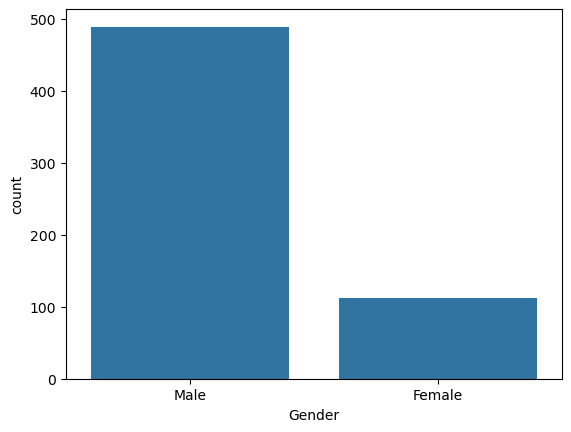

In [9]:
#how many males and females applied fo property loan
sns.countplot(data=data,x="Gender")

In [10]:
#value counts
data['Gender'].value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

<Axes: xlabel='Married', ylabel='count'>

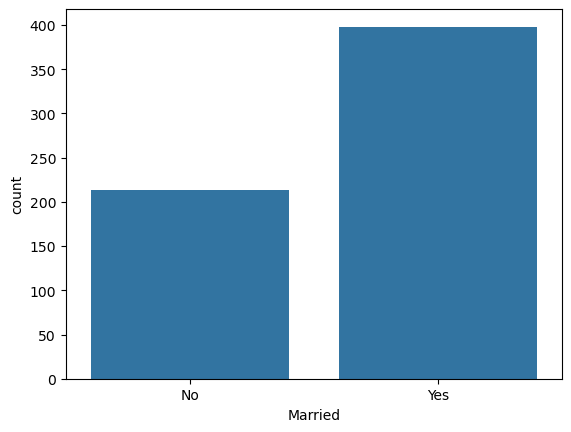

In [11]:
# Marital Status
sns.countplot(data=data,x="Married")

In [12]:
#value counts
data['Married'].value_counts()

Married
Yes    398
No     213
Name: count, dtype: int64

<Axes: xlabel='Dependents', ylabel='count'>

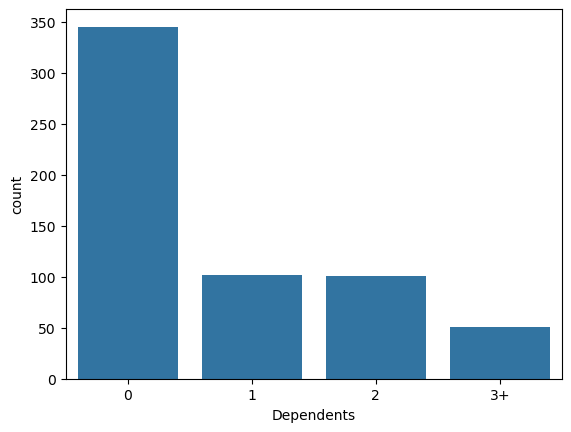

In [13]:
# dependents
sns.countplot(data=data,x="Dependents")

In [14]:
#value counts
data['Dependents'].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

<Axes: xlabel='Education', ylabel='count'>

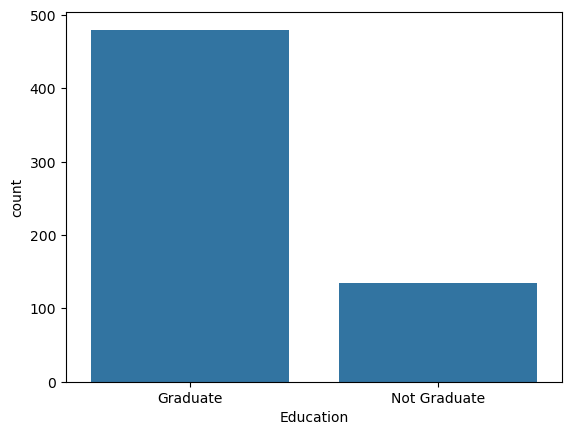

In [15]:
sns.countplot(data=data,x="Education")

In [16]:
#value counts
data['Education'].value_counts()

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

<Axes: xlabel='Self_Employed', ylabel='count'>

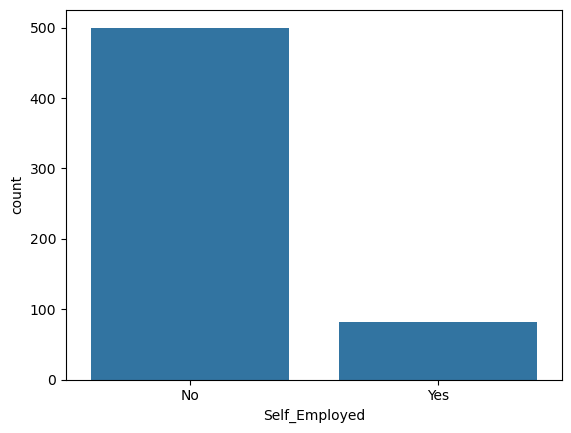

In [17]:
#self employed count
sns.countplot(data=data,x="Self_Employed")

In [18]:
#value counts
data['Self_Employed'].value_counts()

Self_Employed
No     500
Yes     82
Name: count, dtype: int64

<Axes: xlabel='Property_Area', ylabel='count'>

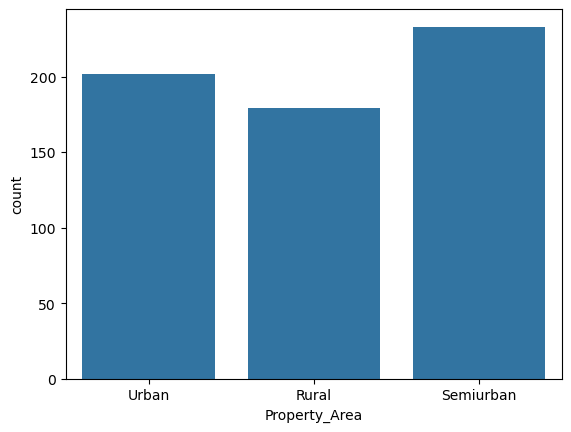

In [19]:
# checking property area counts
sns.countplot(data=data,x="Property_Area")

In [20]:
#value counts
data['Property_Area'].value_counts()

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

<Axes: xlabel='Credit_History', ylabel='count'>

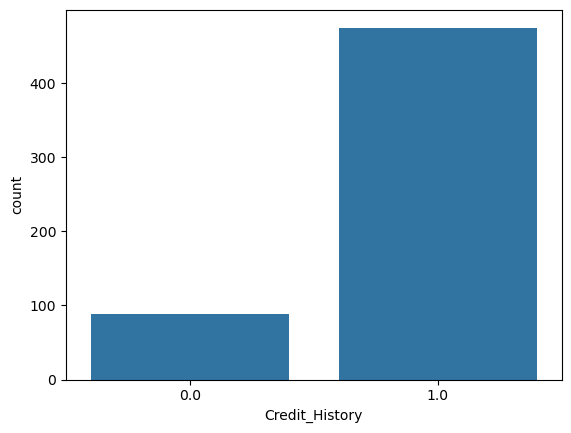

In [21]:
# credit history
sns.countplot(data=data,x="Credit_History")

In [22]:
#value counts
data['Credit_History'].value_counts()

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64

<Axes: xlabel='Loan_Status (Approved)', ylabel='count'>

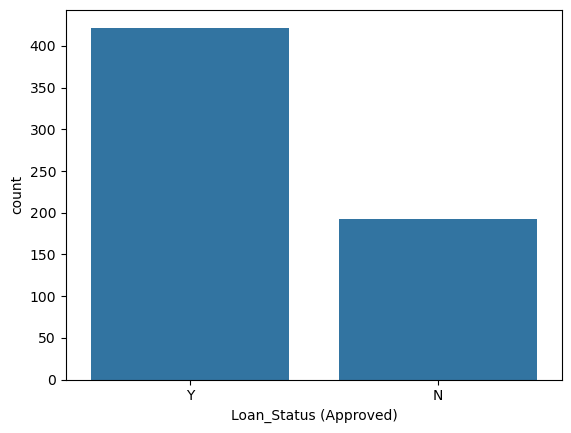

In [23]:
# checking count of approved and not approved 
sns.countplot(data=data,x="Loan_Status (Approved)")

In [24]:
#value counts
data['Loan_Status (Approved)'].value_counts()

Loan_Status (Approved)
Y    422
N    192
Name: count, dtype: int64

### checking Distribution

<Axes: ylabel='Density'>

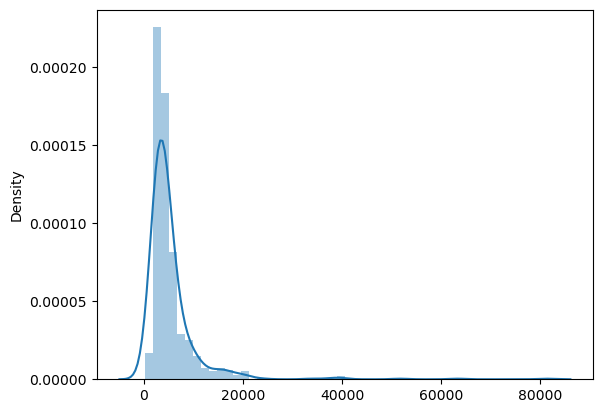

In [25]:
# checking Distribution of applicants income
sns.distplot(x=data.ApplicantIncome)

<Axes: ylabel='Density'>

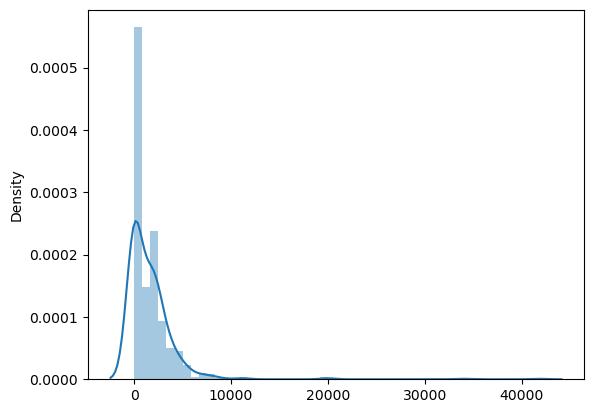

In [26]:
# checking Distribution of co-applicants income
sns.distplot(x=data.CoapplicantIncome)

<Axes: ylabel='Density'>

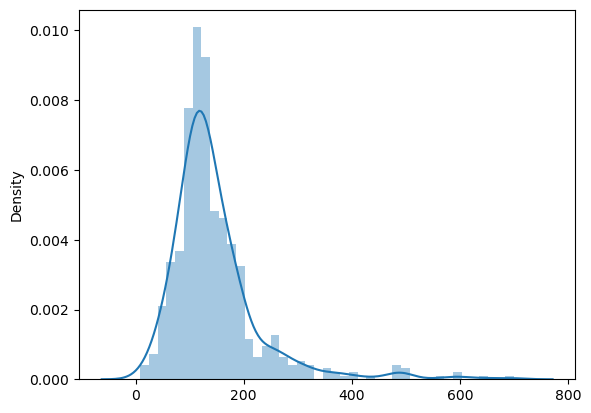

In [27]:
# checking Distribution of loan Amount
sns.distplot(x=data.LoanAmount)

<Axes: ylabel='Density'>

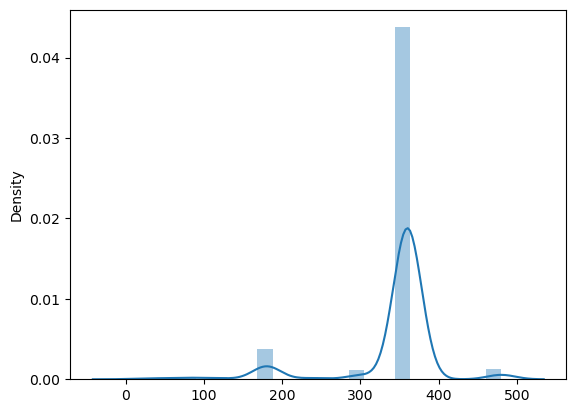

In [28]:
# Loan Amount Term
sns.distplot(x=data.Loan_Amount_Term)

#### Data Preprocessing Pipeline

<Axes: ylabel='Density'>

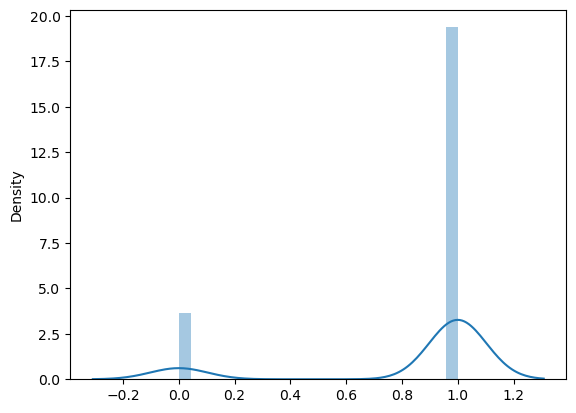

In [29]:
sns.distplot(x=data.Credit_History)

In [30]:
# to check datatypes of variable
data.dtypes

Loan_ID                    object
Gender                     object
Married                    object
Dependents                 object
Education                  object
Self_Employed              object
ApplicantIncome             int64
CoapplicantIncome         float64
LoanAmount                float64
Loan_Amount_Term          float64
Credit_History            float64
Property_Area              object
Loan_Status (Approved)     object
dtype: object

In [31]:
# check for null value
data.isnull().sum()

Loan_ID                    0
Gender                    13
Married                    3
Dependents                15
Education                  0
Self_Employed             32
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                22
Loan_Amount_Term          14
Credit_History            50
Property_Area              0
Loan_Status (Approved)     0
dtype: int64

In [32]:
data['Gender'].fillna(data['Gender'].mode()[0],inplace=True)

In [33]:
data.isnull().sum()

Loan_ID                    0
Gender                     0
Married                    3
Dependents                15
Education                  0
Self_Employed             32
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                22
Loan_Amount_Term          14
Credit_History            50
Property_Area              0
Loan_Status (Approved)     0
dtype: int64

### Filling Null Values

In [34]:
data['Married'].fillna(data['Married'].mode()[0],inplace=True)

In [35]:
data['Dependents'].fillna(data['Dependents'].mode()[0],inplace=True)

In [36]:
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0],inplace=True)

In [37]:
data['LoanAmount'].fillna(data['LoanAmount'].mean(),inplace=True)

In [38]:
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median(),inplace=True)

In [39]:
data['Credit_History'].fillna(data['Credit_History'].median(),inplace=True)

In [40]:
# checking null values after filling
data.isnull().sum()

Loan_ID                   0
Gender                    0
Married                   0
Dependents                0
Education                 0
Self_Employed             0
ApplicantIncome           0
CoapplicantIncome         0
LoanAmount                0
Loan_Amount_Term          0
Credit_History            0
Property_Area             0
Loan_Status (Approved)    0
dtype: int64

In [41]:
# we can't plot a scatter plot directly for categorical features, because scatter plots
#need numeric values on both axes.

In [42]:
data['Loan_Status_Num'] = data['Loan_Status (Approved)'].map({'Y':1, 'N':0})


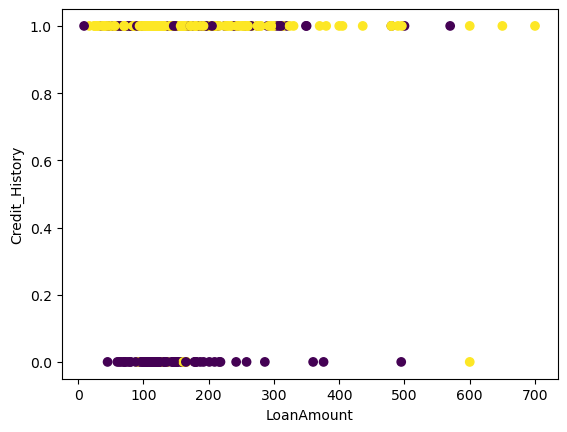

In [43]:
# checking the data linearly separable or not
plt.scatter(data['LoanAmount'], data['Credit_History'], c=data['Loan_Status_Num'])
plt.xlabel('LoanAmount')
plt.ylabel('Credit_History')
plt.show()


In [44]:
data.dtypes

Loan_ID                    object
Gender                     object
Married                    object
Dependents                 object
Education                  object
Self_Employed              object
ApplicantIncome             int64
CoapplicantIncome         float64
LoanAmount                float64
Loan_Amount_Term          float64
Credit_History            float64
Property_Area              object
Loan_Status (Approved)     object
Loan_Status_Num             int64
dtype: object

In [45]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status (Approved)', 'Loan_Status_Num'],
      dtype='object')

#### Label Encoding

In [58]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

categorical_cols = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area']

for col in categorical_cols:
    data[col] = le.fit_transform(data[col].astype(str))



In [63]:
# Droping Loan_ID (ID column is not useful for ML)
data = data.drop('Loan_ID', axis=1)


#### Create X and y

In [64]:
X = data.drop(['Loan_Status (Approved)', 'Loan_Status_Num'], axis=1)
y = data['Loan_Status_Num']


#### Split Data

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### Standard Scaling (important for SVM)

In [66]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#### Training SVM Model

In [67]:
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_scaled, y_train)


SVC(random_state=42)

In [68]:
y_pred = svm_model.predict(X_test_scaled)


#### Evaluation (Accuracy, Confusion Matrix, Report)

In [69]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7886178861788617

Confusion Matrix:
 [[18 25]
 [ 1 79]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



#### ROC-AUC Curve

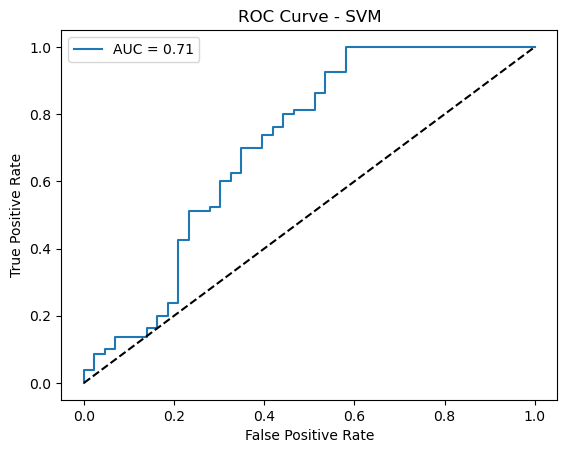

In [70]:
from sklearn.metrics import roc_curve, auc

# SVM with probability = True
svm_prob = SVC(kernel='rbf', probability=True)
svm_prob.fit(X_train_scaled, y_train)

y_proba = svm_prob.predict_proba(X_test_scaled)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label="AUC = %.2f" % roc_auc)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - SVM")
plt.legend()
plt.show()
